In [76]:
import matplotlib.pyplot as plt
from matplotlib.text import Text
import pandas as pd
import seaborn as sns
from datetime import datetime

- [Fix x-axis labels in the box plot example](#boxplot_exercise)
- [Fix x-axis labels in the heatmap example](#heatmap_exercise)
- [Fix x-axis labels and center the color scale in the clustermap example](#clustermap_exercise)
    
    Use the snb-data-zimoma-en-all-20170502_1430.csv file to produce the following:
    - Line chart of the ‘1TGT’ series
    - Box plots of all series (Use the data/README.md to find the correct ordering of the terms)
    - Scatter plot against 3M0 each of the other 3-month rates (EG3M, 3M[1..4])
    - Bar plot of avg 1TGT rates per year
    - Horizontal bar plot of avg 1TGT rates per year (years in the y-axis, yield in the x-axis)
    - Heatmap of money-market rates
    - Clustered heatmap of money-market rates
    - Box plots with outliers of all series
    - Time-series plots of all series
    - Scatter plot of each of the different 3-month rates, with regression lines

---

## Boxplot Exercise

Recreate dataframe in demo notebook

In [3]:
df = pd.read_csv("data/snb-data-rendoblim-en-all-20170502_1430.csv")
df['Date'] = pd.to_datetime(df['Date'])
df.set_index(['Date', 'D0'], inplace=True)
df.sort_index(inplace=True)
df = df.unstack()['Value']

Fix the x-labels -- they should say 1Y, 2Y, etc.

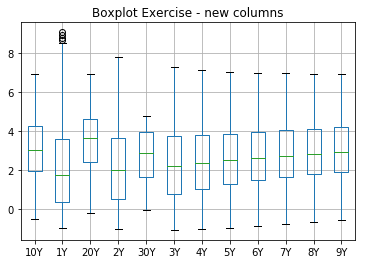

In [4]:
df.columns = [col.replace("J", "Y") for col in df.columns]
ax = df.boxplot()
ax.set_title("Boxplot Exercise - new columns")
None

## Heatmap Exercise

Recreate dataframe in demo notebook

In [5]:
#use dataframe from boxplot exercise
df.head()

10Y     1Y    20Y     2Y  30Y     3Y     4Y     5Y     6Y  \
Date                                                                      
1988-01-01  4.092  2.887  4.326  3.218  NaN  3.393  3.554  3.695  3.810   
1988-02-01  4.098  2.638  4.332  2.990  NaN  3.271  3.498  3.672  3.804   
1988-03-01  3.998  2.641  4.255  3.263  NaN  3.573  3.734  3.823  3.878   
1988-04-01  3.965  2.800  4.200  3.250  NaN  3.467  3.594  3.684  3.757   
1988-05-01  4.127  3.191  4.247  3.602  NaN  3.802  3.909  3.974  4.019   

               7Y     8Y     9Y  
Date                             
1988-01-01  3.904  3.980  4.041  
1988-02-01  3.905  3.984  4.047  
1988-03-01  3.916  3.946  3.972  
1988-04-01  3.819  3.874  3.923  
1988-05-01  4.054  4.082  4.106

Fix the x-labels -- they should say 1Y, 2Y, etc. (done in boxplot exercise)

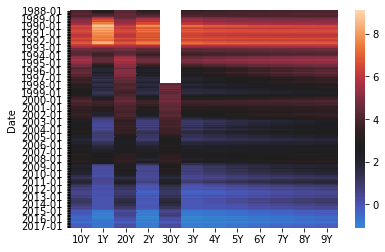

In [6]:
labels = [t.strftime("%Y-%m") if i%12 == 0 else "" for i, t in enumerate(df.index)]
ax = sns.heatmap(df, yticklabels=labels, center=df.stack().mean())

## Clustermap Exercise

Recreate dataframe from demo notebook

In [7]:
# use df from boxplot exercise
df.head()

10Y     1Y    20Y     2Y  30Y     3Y     4Y     5Y     6Y  \
Date                                                                      
1988-01-01  4.092  2.887  4.326  3.218  NaN  3.393  3.554  3.695  3.810   
1988-02-01  4.098  2.638  4.332  2.990  NaN  3.271  3.498  3.672  3.804   
1988-03-01  3.998  2.641  4.255  3.263  NaN  3.573  3.734  3.823  3.878   
1988-04-01  3.965  2.800  4.200  3.250  NaN  3.467  3.594  3.684  3.757   
1988-05-01  4.127  3.191  4.247  3.602  NaN  3.802  3.909  3.974  4.019   

               7Y     8Y     9Y  
Date                             
1988-01-01  3.904  3.980  4.041  
1988-02-01  3.905  3.984  4.047  
1988-03-01  3.916  3.946  3.972  
1988-04-01  3.819  3.874  3.923  
1988-05-01  4.054  4.082  4.106

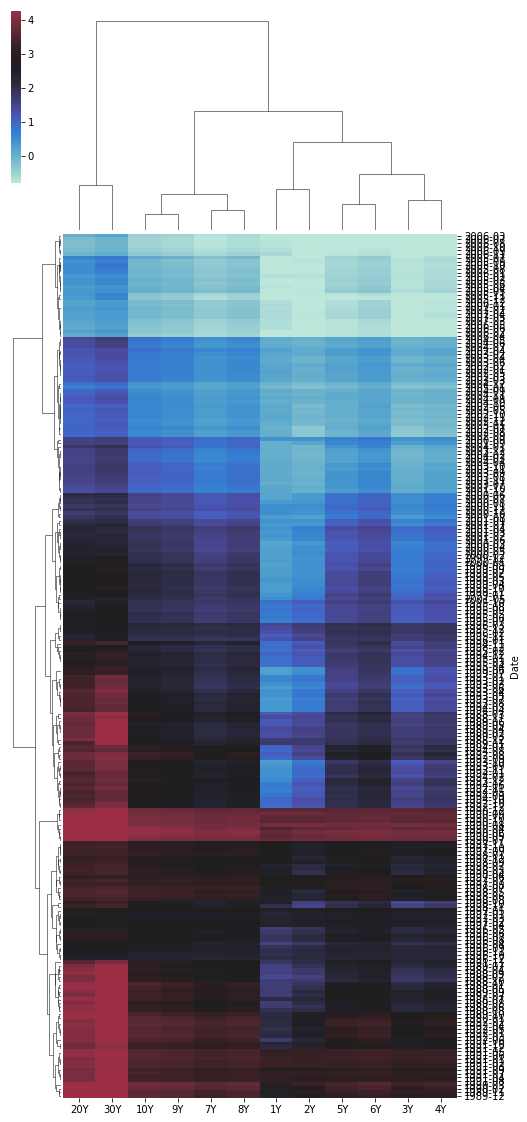

In [8]:
labels = [t.strftime("%Y-%m") for t in df.index]
cg = sns.clustermap(df.dropna(), 
                    yticklabels=labels, 
                    robust=True, 
                    center=df.stack().mean(),
                    figsize=(8, 20))
plt.setp(cg.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
None

---

### Using zimoma dataset

In [9]:
data = pd.read_csv("data/snb-data-zimoma-en-all-20170502_1430.csv")
data.Date = pd.to_datetime(data.Date)
data.set_index(['Date', 'D0'], inplace=True)
data.sort_index(inplace=True)
data = data.dropna(axis=0)
data = data.unstack()

Line chart of the ‘1TGT’ series

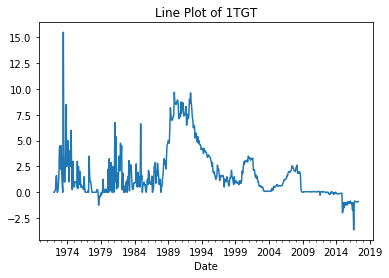

In [10]:
data.loc[:, ("Value", "1TGT")].plot(y="Value", title="Line Plot of 1TGT")
None

Box plots of all series (Use the data/README.md to find the correct ordering of the terms)

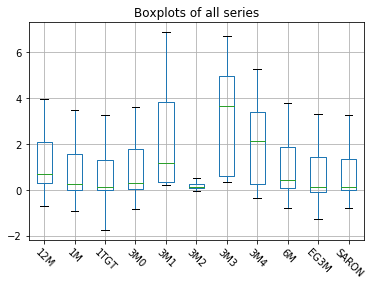

In [11]:
ax = data.dropna().boxplot(showfliers=False)
ax.set_title("Boxplots of all series")
_ = ax.set_xticklabels(labels = [col[1] for col in data.columns],
                       rotation=-45)

Box plots with outliers of all series

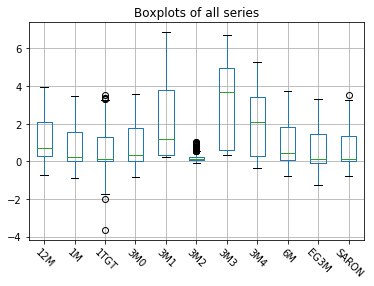

In [12]:
ax = data.dropna().boxplot()
ax.set_title("Boxplots of all series")
_ = ax.set_xticklabels(labels = [col[1] for col in data.columns],
                       rotation=-45)

Scatter plot against 3M0 each of the other 3-month rates (EG3M, 3M[1..4])

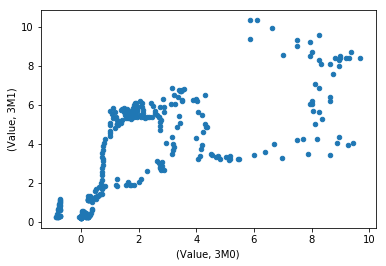

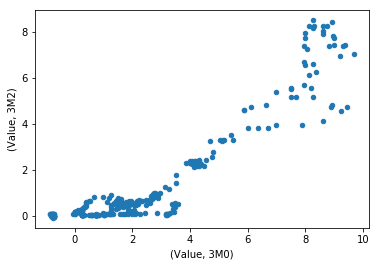

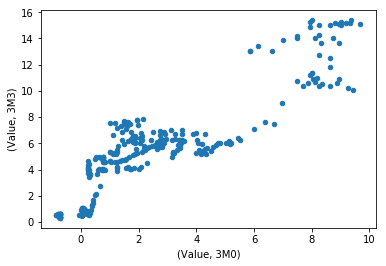

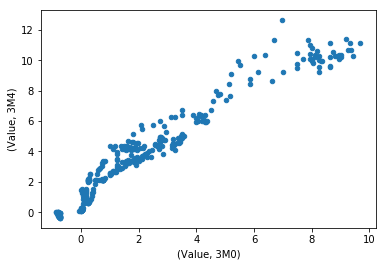

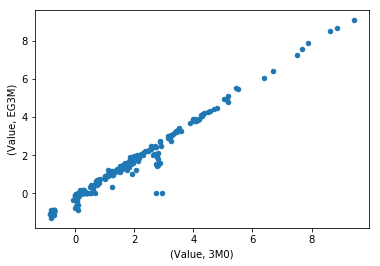

In [13]:
for col in data.columns:
    if "3" in col[1] and col[1] != "3M0":
        _ = data.plot.scatter(x=("Value", "3M0"), y=("Value", col[1]))


Bar plot of avg 1TGT rates per year

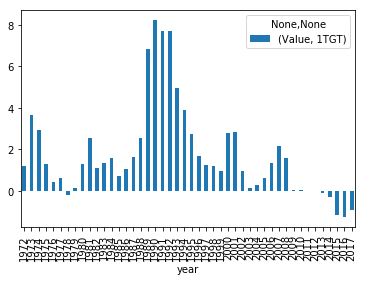

In [14]:
data_year = data
data_year['year']= [col.year for col in data.index]
pd.DataFrame(data_year.groupby("year").mean()[("Value", "1TGT")]).plot.bar()
None

Horizontal bar plot of avg 1TGT rates per year (years in the y-axis, yield in the x-axis)

In [15]:
data_bar = pd.DataFrame(data_year.groupby("year").mean()[("Value", "1TGT")]).reset_index()

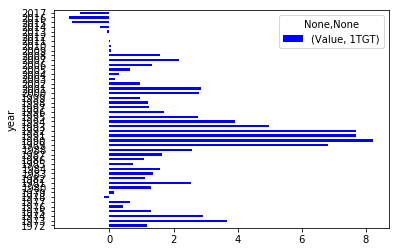

In [16]:
_ = data_bar.plot.barh("year", color='b')

Heatmap of money-market rates

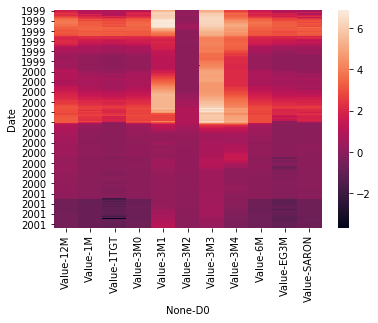

In [27]:
df_heat = data.dropna().drop('year', axis=1)
ax = sns.heatmap(df_heat)
_ = ax.set_yticklabels([c.year for c in df_heat.index])

Clustered heatmap of money-market rates

[Text(0,1,'2000'), Text(0,1,'2001'), Text(0,1,'2007'), Text(0,1,'2006'), Text(0,1,'2008'), Text(0,1,'2013'), Text(0,1,'2014'), Text(0,1,'2014'), Text(0,1,'2012'), Text(0,1,'2012'), Text(0,1,'2010'), Text(0,1,'2010'), Text(0,1,'2009'), Text(0,1,'2017'), Text(0,1,'2016'), Text(0,1,'2001'), Text(0,1,'1999'), Text(0,1,'2005'), Text(0,1,'2008'), Text(0,1,'2004'), Text(0,1,'2003'), Text(0,1,'2003')]


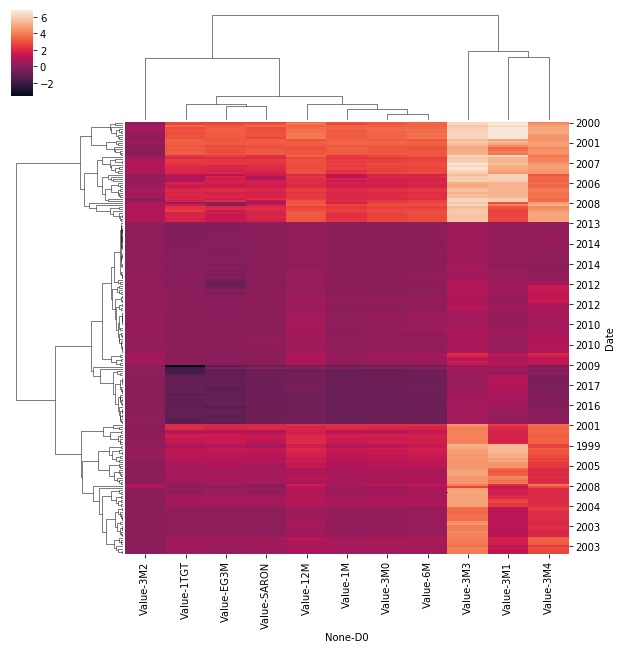

In [87]:
ax = sns.clustermap(df_heat, 
                    yticklabels=10)
formatted = [Text(0,1,c.get_text().split("-")[0]) for c in ax.ax_heatmap.yaxis.get_majorticklabels()]
ax.ax_heatmap.set(yticklabels=formatted)
None

Time-series plots of all series

       D0    Date      
Value  12M   2007-08-01       3.00250
       EG3M  1997-11-01       1.72000
       3M2   2016-12-01      -0.04657
       12M   2006-07-01       1.97083
year         2007-09-01    2007.00000
dtype: float64


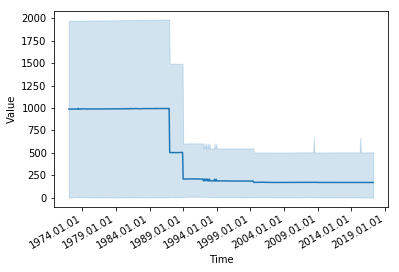

In [19]:
import matplotlib.dates as mdates

ser = data.unstack().dropna()
print(ser.sample(5))
ser.name = 'Value'
tdf = ser.reset_index()
tdf['Time'] = tdf['Date'].apply(lambda x: mdates.date2num(x))
tdf['Unit'] = tdf['Date'].apply(lambda x: "0")
fig, ax = plt.subplots()
sns.lineplot(data=tdf, x='Time', y='Value',ax=ax)
# assign locator and formatter for the xaxis ticks.
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y.%m.%d'))

# put the labels at 45deg since they tend to be too long
fig.autofmt_xdate()

Scatter plot of each of the different 3-month rates, with regression lines

In [20]:
scatter_data = data.dropna()
scatter_data['year'] = [col.year for col in scatter_data.index]

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


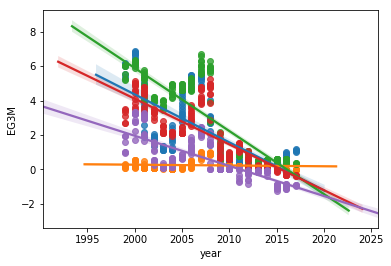

In [21]:
for col in scatter_data.columns:
    tdf = pd.DataFrame(scatter_data)
    if "3" in col[1] and col[1] != "3M0":
        tdf['year'] = scatter_data['year']
        tdf[col[1]] = scatter_data[("Value", col[1])]
        _ = sns.regplot(x="year", y=col[1], data=tdf)